# Quickstart

## 0. Installation

Look at the [README](https://github.com/kausable/CausalDynamics/blob/main/README.md) for installation instructions.

## 1. Generate data

Let's look at how to generate data for the case of coupled causal models and visualize it.

This code will first create a structural causal model. The `create_scm` function returns the adjacency matrix `A` of the SCM, the weights `W` and biases `b` of all the MLPs located on the nodes and the `root_nodes` that act as temporal system driving functions.

We use this SCM to simulate a system consisting of `num_nodes` for `num_timesteps` and driven by the dynamical systems `system_name` that are located on the root nodes.

INFO - Creating SCM with 2 nodes and 3 dimensions each...
INFO - Simulating Lorenz system for 1000 timesteps...
/Users/herdeanu/kausable/causaldynamics/src/causaldynamics/plot.py:759: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


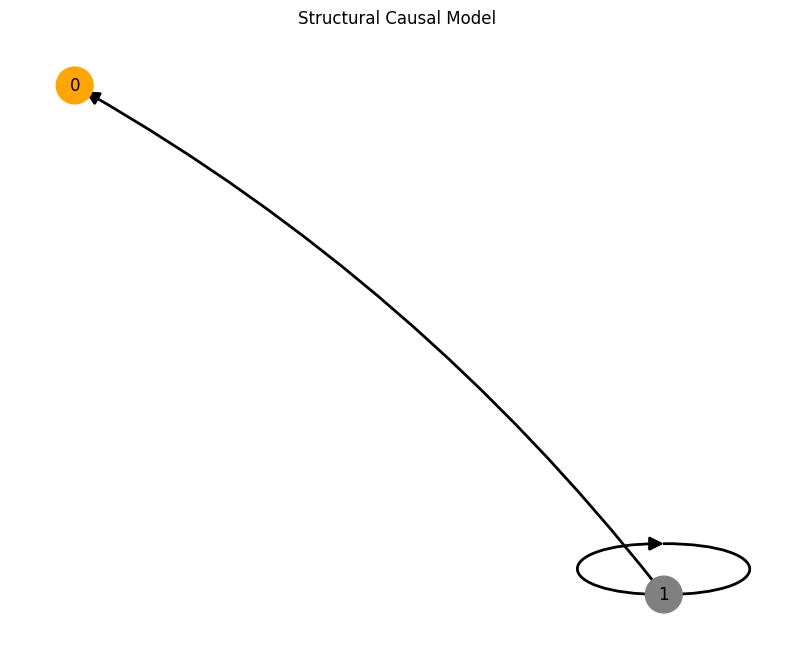

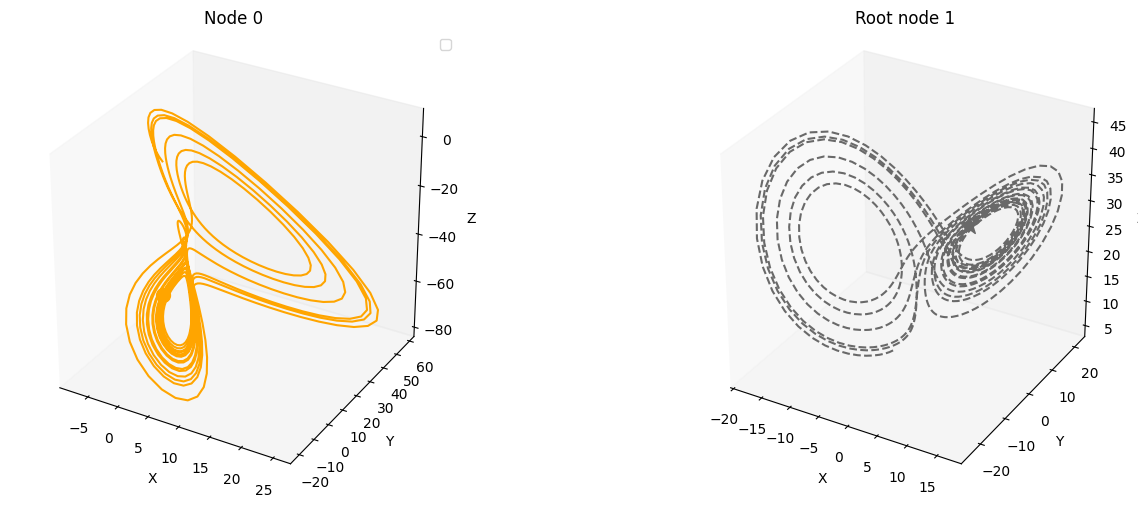

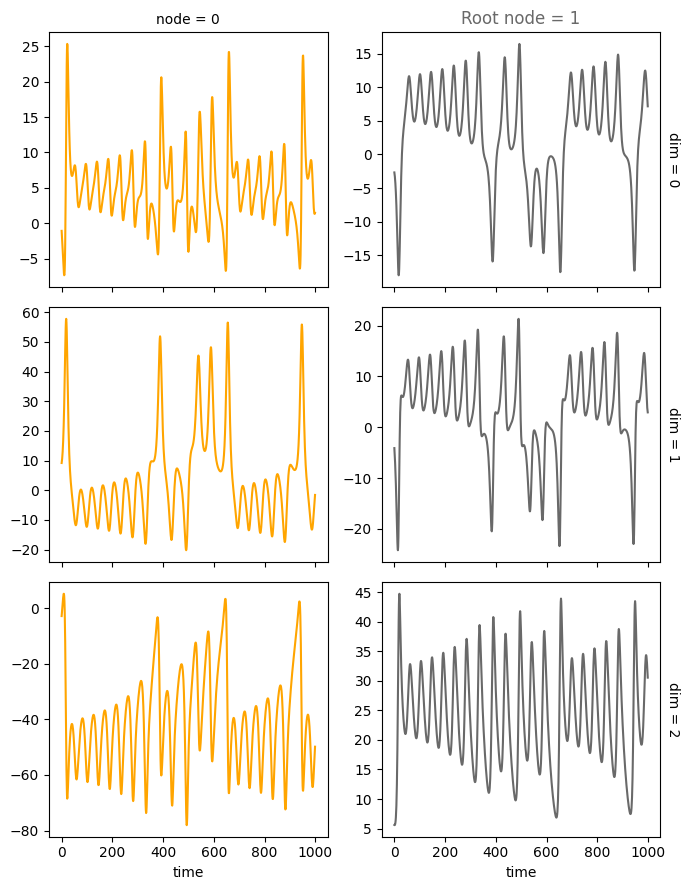

In [1]:
from causaldynamics.scm import create_scm_graph
from causaldynamics.creator import create_scm, simulate_system
from causaldynamics.plot import plot_scm, plot_trajectories, plot_3d_trajectories

# Define parameters
num_nodes = 2
node_dim = 3
num_timesteps = 1000

system_name='Lorenz'
confounders = False

# Create the coupled structural causal model
A, W, b, root_nodes, _ = create_scm(num_nodes, node_dim, confounders=confounders)

# Simulate the system
data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name) 

# Visualize the SCM and the system
plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_3d_trajectories(data, root_nodes)
plot_trajectories(data, root_nodes=root_nodes, sharey=False)

We provide several features that can be used conveniently accessed through the `create_scm` and `simulate_system` functions:

INFO - Creating SCM with 5 nodes and 3 dimensions each...
INFO - Simulating random system for 500 timesteps...
/Users/herdeanu/kausable/causaldynamics/.venv/lib/python3.10/site-packages/dysts/base.py:353: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
/Users/herdeanu/kausable/causaldynamics/src/causaldynamics/plot.py:759: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Axes3D: title={'center': 'Node 0'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Node 1'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 2'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 3'}, xlabel='X', ylabel='Y', zlabel='Z'>,
 <Axes3D: title={'center': 'Root node 4'}, xlabel='X', ylabel='Y', zlabel='Z'>)

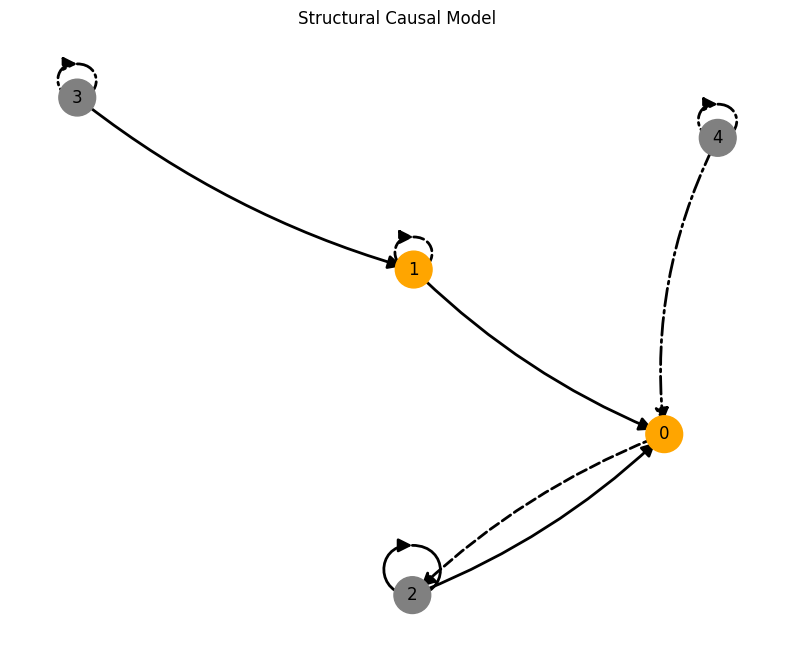

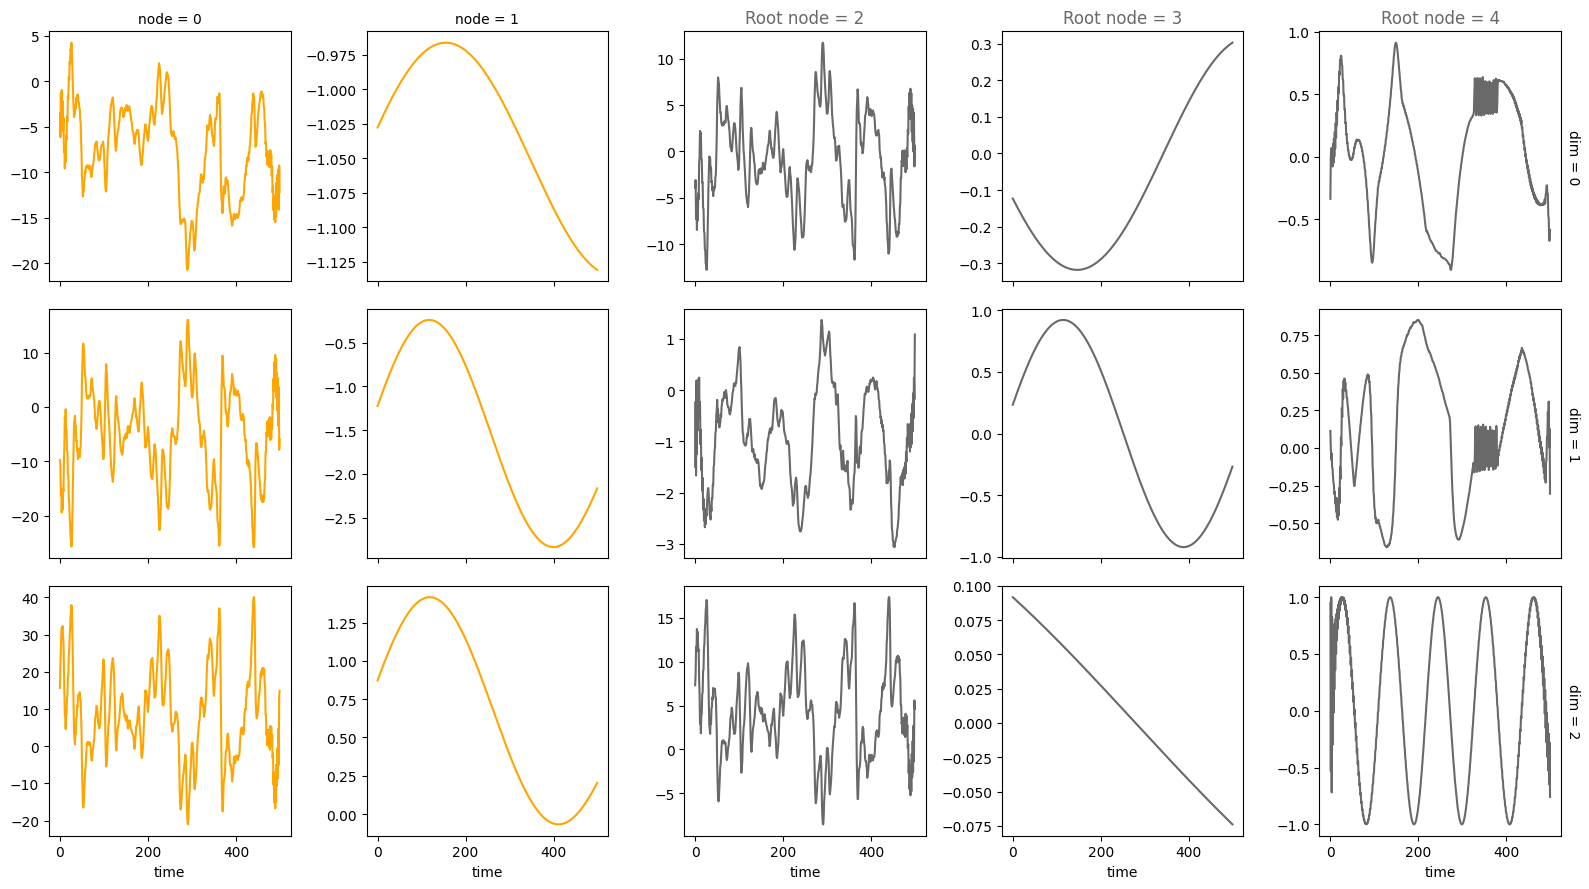

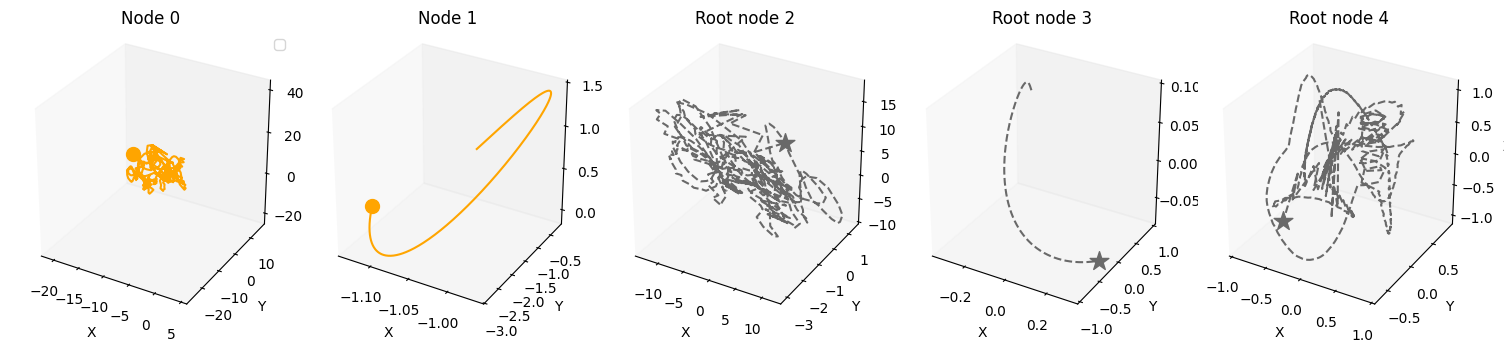

In [2]:
from causaldynamics.creator import create_scm, simulate_system
from causaldynamics.plot import plot_scm, plot_trajectories, plot_3d_trajectories

num_nodes = 5
node_dim = 3
num_timesteps = 500

confounders = False    # set to True to add scale-free confounders
standardize = False    # set to True to standardize the data
init_ratios = [1, 1]   # set ratios of dynamical systems and periodic drivers at root nodes. Here: equal ratio.
system_name='random'   # sample random dynamical system for the root nodes
noise = 0.5            # set noise for the dynamical systems

time_lag = 10                   # set time lag for time-lagged edges
time_lag_edge_probability = 0.1 # set probability of time-lagged edges


A, W, b, root_nodes, _ = create_scm(num_nodes, 
                                    node_dim,
                                    confounders=confounders,
                                    time_lag=time_lag,
                                    time_lag_edge_probability=time_lag_edge_probability)

data = simulate_system(A, W, b, 
                      num_timesteps=num_timesteps, 
                      num_nodes=num_nodes,
                      system_name=system_name,
                      init_ratios=init_ratios,
                      time_lag=time_lag,
                      standardize=standardize,
                      make_trajectory_kwargs={'noise': noise}) 

plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plot_trajectories(data, root_nodes=root_nodes, sharey=False)
plot_3d_trajectories(data, root_nodes, line_alpha=1.)

For an overview of the features, have a look at the [features notebook](https://github.com/kausable/CausalDynamics/blob/main/notebooks/features.ipynb) and the [coupled causal models notebook](https://github.com/kausable/CausalDynamics/blob/main/notebooks/coupled_causal_models.ipynb). If you want more information on specific features, look at their respective notebook, e.g., [driver](https://github.com/kausable/CausalDynamics/blob/main/notebooks/driver.ipynb) or [time_lag](https://github.com/kausable/CausalDynamics/blob/main/notebooks/features.ipynb).

## 2. Run Scripts
We provide several ready to use scripts to generate benchmark data for the simplex, coupled, and climate scenario respectively. Have a look at the scripts [README](https://github.com/herdeanu/CausalDynamics/blob/main/scripts/README.md) 